In [1]:
#THis program predicts if a passenger will survive on the titanic

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [62]:
df = sns.load_dataset('titanic')
df.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [9]:
df.shape

(891, 15)

In [10]:
#get some statistics
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
#number of survivors
df['survived'].value_counts()

0    549
1    342
Name: survived, dtype: int64

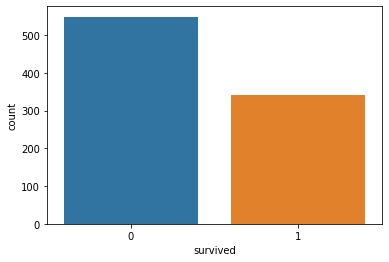

In [14]:
#visualize the count of survivors
sns.countplot(df['survived'],label='Count')

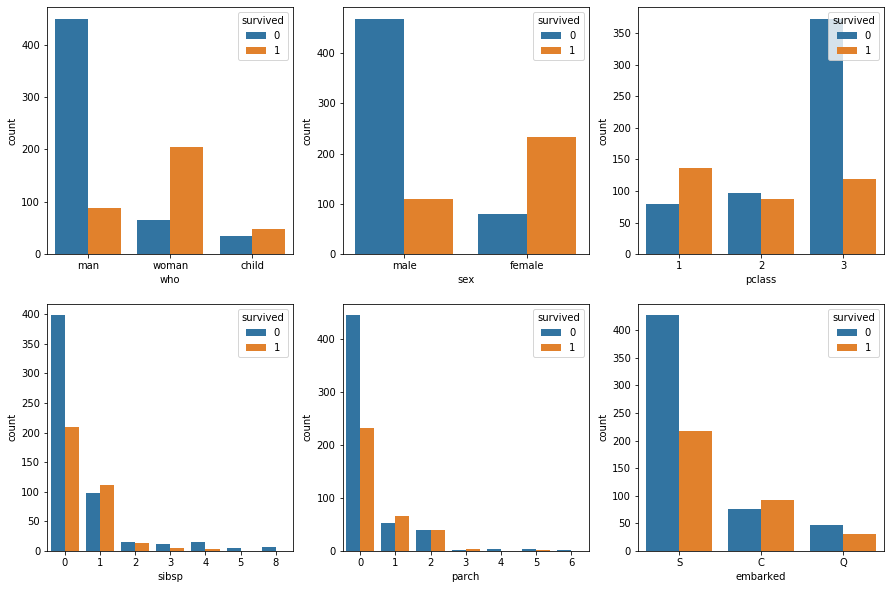

In [39]:
fig, axis = plt.subplots(2,3,figsize=(15,10))

sns.countplot(df['who'],hue=df["survived"],ax=axis[0][0])
sns.countplot(df['sex'],hue=df["survived"],ax=axis[0][1])
sns.countplot(df['pclass'],hue=df["survived"],ax=axis[0][2])
sns.countplot(df['sibsp'],hue=df["survived"],ax=axis[1][0])
sns.countplot(df['parch'],hue=df["survived"],ax=axis[1][1])
sns.countplot(df['embarked'],hue=df["survived"],ax=axis[1][2])
axis[0][0].legend(title="survived", loc='upper right')
axis[0][1].legend(title="survived", loc='upper right')
axis[0][2].legend(title="survived", loc='upper right')
axis[1][0].legend(title="survived", loc='upper right')
axis[1][1].legend(title="survived", loc='upper right')
axis[1][2].legend(title="survived", loc='upper right')
 


In [40]:
#survival by sex
df.groupby('sex')['survived'].mean()

sex
female    0.742038
male      0.188908
Name: survived, dtype: float64

In [47]:
#Look survival by sex and class
df.pivot_table('survived',index='sex',columns='class')

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


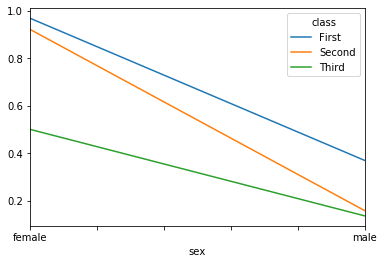

In [46]:
#Visually by class and sex
df.pivot_table('survived',index='sex',columns='class').plot()

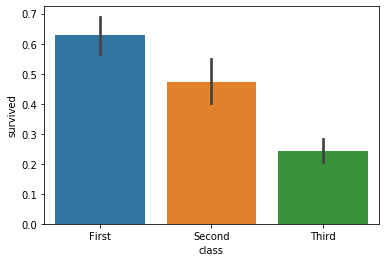

In [49]:
sns.barplot(x='class',y='survived',data = df)

In [51]:
df.pivot_table('survived',['sex',pd.cut(df['age'],[0,20,80])],'class')

class               First    Second     Third
sex    age                                   
female (0, 20]   0.928571  1.000000  0.510638
       (20, 80]  0.971831  0.896552  0.418182
male   (0, 20]   0.571429  0.526316  0.197368
       (20, 80]  0.382979  0.062500  0.129944

In [52]:
#NaN values count
df.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [63]:
#Drop the colums
df = df.drop(['deck', 'embark_town', 'alive', 'class', 'alone', 'adult_male', 'who'], axis=1)

In [68]:
#remove missing rows
df = df.dropna(subset = ['age','embarked'])
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [66]:
df.isna().sum()

survived    0
pclass      0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
dtype: int64

In [94]:
df.dtypes

survived      int64
pclass        int64
sex           int64
age         float64
sibsp         int64
parch         int64
fare        float64
embarked      int64
dtype: object

In [95]:
#unique values
print(df['sex'].unique())
print(df['embarked'].unique())

[1 0]
[2 0 1]


In [96]:
#Encoder to code the sex and embarkes column
from sklearn.preprocessing import LabelEncoder
df.iloc[:,2] = LabelEncoder().fit_transform(df.iloc[:,2].values)
df.iloc[:,7] = LabelEncoder().fit_transform(df.iloc[:,7].values)


In [97]:
print(df['sex'].unique())
print(df['embarked'].unique())

[1 0]
[2 0 1]


In [98]:
#split data x and y(depentent)
x = df.iloc[:,1:8]
y = df.iloc[:,0]

In [99]:
#split data to 80, 20
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [100]:
#Feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [241]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators = 20, criterion = 'entropy', random_state = 0,oob_score = True)
forest.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=20, oob_score=True,
                       random_state=0)

In [240]:
forest.score(x_train,y_train)

0.9824253075571178

In [242]:
forest.oob_score_

0.7873462214411248

In [218]:
#confusion matrix
from sklearn.metrics import confusion_matrix
TN,FP,FN,TP = confusion_matrix(y_test,forest.predict(x_test)).ravel()
print(cm)
(TP+TN)/(TP+TN+FP+FN)

[75  9 17 42]


0.7832167832167832

In [144]:
#get importance of feature
print(x_test[0])
print(forest.predict(x_test))
print(np.array(y_test))

[ 0.89931844  0.7822391  -0.67175548 -0.5564252  -0.50227314 -0.58181851
 -1.97442709]
[1 1 1 0 0 0 1 0 0 0 1 0 0 1 0 0 1 0 1 0 0 0 1 0 0 0 1 0 1 1 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 0 1 0 0 1 0 1 0 0
 1 0 0 1 0 0 1 1 1 1 0 1 1 1 0 0 0 1 1 1 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 1 1
 0 0 1 0 0 1 0 0 0 0 1 0 1 0 1 0 1 0 1 1 1 0 1 0 0 1 0 0 1 0 0 0]
[0 1 1 1 0 0 1 0 0 0 1 0 0 0 0 1 1 1 1 0 1 0 1 0 0 0 1 1 1 1 0 0 0 1 0 0 0
 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 1 1 1 1 0 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0
 1 0 0 1 1 0 1 1 1 1 0 1 1 1 0 1 1 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 1
 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 1 1 1 0 1 0 0 1 0 1 0 0 0 0]


In [145]:
'''In it, I will have a pclass = 3, meaning I would probably be in the third class because of the cheaper price.
I am a male, so sex = 1.
I am older than 18, so I will put age = 21.
Most likely, I would not be on the ship with siblings or spouses, so sibsp = 0.
Nor with any children or parents, so parch = 0.
I would try to pay the minimum fare, so fare = 0.
I would’ve embarked from Queenstown, so embarked = 1.'''
my_survival = [[0.89931844 , 0.7822391 , -0.67175548, -0.5564252,  -0.50227314 ,-0.58181851,
 -1.97442709]]
pre = forest.predict(my_survival)
print(pre)
if pre == 0:
    print('Bad luck')
else:
    print('You are very lucky')

[1]
You are very lucky


In [168]:
#K-Fold cross validation
r = [1,2,5,10,15,20,25,30,50]
for n in r:
    from sklearn.model_selection import cross_val_score
    cvs = cross_val_score(RandomForestClassifier(n_estimators= n, criterion = 'entropy', random_state = 0),x_train,y_train,cv=3)
    print( np.average(cvs))
    
    

0.7311612364243943
0.7557412048640119
0.7732850645131347
0.780349020699898
0.8014387821405364
0.8032024505708716
0.7979114452798663
0.8049197066740926
0.8137380488257682


In [179]:
#GridsearchCV
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(RandomForestClassifier (random_state = 0),{
    'n_estimators': [1,2,5,10,15,20,25,30,50]
    
},cv=7,return_train_score=False)
clf.fit(x_train,y_train)
clf.cv_results_


{'mean_fit_time': array([0.0046665 , 0.00950248, 0.02795904, 0.01427341, 0.02262739,
        0.03853093, 0.0402941 , 0.04099141, 0.07260728]),
 'std_fit_time': array([0.00104062, 0.00182351, 0.04917467, 0.00140691, 0.00319577,
        0.00989841, 0.01175495, 0.00297068, 0.0084243 ]),
 'mean_score_time': array([0.00186518, 0.00209764, 0.00101253, 0.00128416, 0.00194243,
        0.00357917, 0.00239958, 0.00266811, 0.00424419]),
 'std_score_time': array([1.07974792e-03, 5.97081164e-04, 1.13300006e-04, 2.34847672e-05,
        4.39896621e-04, 2.11768036e-03, 1.21632929e-04, 1.84480941e-04,
        4.03057125e-04]),
 'param_n_estimators': masked_array(data=[1, 2, 5, 10, 15, 20, 25, 30, 50],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value='?',
             dtype=object),
 'params': [{'n_estimators': 1},
  {'n_estimators': 2},
  {'n_estimators': 5},
  {'n_estimators': 10},
  {'n_estimators': 15},
  {'n_estimators': 20},

In [180]:
pd.DataFrame(clf.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,mean_test_score,std_test_score,rank_test_score
0,0.004666,0.001041,0.001865,0.001080,1,{'n_estimators': 1},0.731707,0.634146,0.740741,0.753086,0.703704,0.777778,0.740741,0.725986,0.042788,9
1,0.009502,0.001824,0.002098,0.000597,2,{'n_estimators': 2},0.731707,0.731707,0.802469,0.728395,0.753086,0.827160,0.703704,0.754033,0.041200,8
2,0.027959,0.049175,0.001013,0.000113,5,{'n_estimators': 5},0.768293,0.743902,0.802469,0.802469,0.802469,0.851852,0.777778,0.792747,0.031588,7
3,0.014273,0.001407,0.001284,0.000023,10,{'n_estimators': 10},0.804878,0.743902,0.851852,0.827160,0.777778,0.851852,0.790123,0.806792,0.036944,1
4,0.022627,0.003196,0.001942,0.000440,15,{'n_estimators': 15},0.804878,0.707317,0.864198,0.814815,0.790123,0.851852,0.802469,0.805093,0.047155,2
5,0.038531,0.009898,0.003579,0.002118,20,{'n_estimators': 20},0.804878,0.731707,0.827160,0.790123,0.814815,0.851852,0.814815,0.805050,0.034789,3
6,0.040294,0.011755,0.002400,0.000122,25,{'n_estimators': 25},0.817073,0.719512,0.827160,0.790123,0.790123,0.864198,0.814815,0.803286,0.041348,4
7,0.040991,0.002971,0.002668,0.000184,30,{'n_estimators': 30},0.817073,0.731707,0.827160,0.777778,0.765432,0.864198,0.802469,0.797974,0.040498,6
8,0.072607,0.008424,0.004244,0.000403,50,{'n_estimators': 50},0.804878,0.768293,0.802469,0.765432,0.790123,0.864198,0.814815,0.801458,0.030831,5


In [181]:
clf.best_score_

0.8067922742719491

In [182]:
clf.best_params_

{'n_estimators': 10}

In [185]:
#putting different models
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(random_state=0)
log.fit(x_train,y_train)
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
knn.fit(x_train,y_train)
from sklearn.svm import SVC
svc = SVC(kernel='linear',random_state=0)
svc.fit(x_train,y_train)

SVC(kernel='linear', random_state=0)

In [210]:
model_params = {
    'log':{
        'model': LogisticRegression(random_state=0),
        'params':{
            "C":[1,5,10]
        }    
        },
    'knn':{
        'model': KNeighborsClassifier(),
        'params':{
                "n_neighbors":[1,5,10]
        }    
        },
    'svc':{
        'model': SVC(random_state=0),
        'params':{
            'kernel':['linear','rbf']
        }    
        },
    "forest":{
        'model': RandomForestClassifier( criterion = 'entropy', random_state = 0),
        'params':{
                 'n_estimators':[1,5,10,15,20,30]
    }
}
}
    


In [211]:
score = []
for model_name,mp in model_params.items():
    clf = GridSearchCV(mp['model'],mp['params'],cv = 5,return_train_score=False)
    clf.fit(x_train,y_train)
    score.append({
        'model':model_name,
        'best_score':clf.best_score_,
        'best_params': clf.best_params_
    })
    


In [212]:
pd.DataFrame(score)

,model,best_score,best_params
0,log,0.801335,{'C': 1}
1,knn,0.819003,{'n_neighbors': 5}
2,svc,0.836563,{'kernel': 'rbf'}
3,forest,0.810169,{'n_estimators': 20}


In [222]:
#ROC-AUC-Score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
roc_auc_score(y_test,forest.predict(x_test))


0.7700766747376916

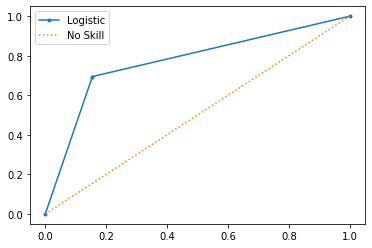

In [234]:
from matplotlib import pyplot
fpr, tpr, _ =roc_curve(y_test,forest.predict(x_test))
pyplot.plot(fpr, tpr, marker='.', label='Logistic')
pyplot.plot([0, 1], [0, 1], linestyle=':', label='No Skill')
pyplot.legend()
pyplot.show()

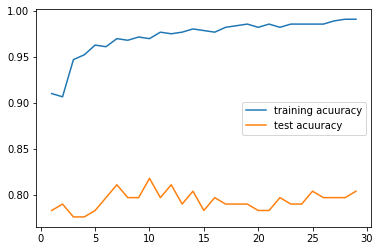

In [249]:
train_acc = []
test_acc = []
n = range(1,30)
for k in n:
    
    forest = RandomForestClassifier(n_estimators = k, criterion = 'entropy', random_state = 0)
    forest.fit(x_train, y_train)
    train_acc.append(forest.score(x_train,y_train))
    test_acc.append(forest.score(x_test,y_test))
    
plt.plot(n,train_acc,label='training acuuracy')
plt.plot(n,test_acc,label='test acuuracy')
plt.legend()

In [250]:
import pickle

In [251]:
pickle_out = open("forest.pkl",'wb')
pickle.dump(forest,pickle_out)
pickle_out.close()

In [252]:
pwd

'/Users/sunilkumar'